# Step 2 - Cleaning and visualizing daily step and sleep data

In [1]:
import fitbit
from bin.parse_credentials import parse_client_credentials, parse_tokens

client_id, client_secret = parse_client_credentials('client_id_secret.txt')

!./gather_keys_oauth2.py $client_id $client_secret >access_refresh_tokens.txt 2>/dev/null

access_token, refresh_token = parse_tokens('access_refresh_tokens.txt')

authd_client = fitbit.Fitbit(client_id, client_secret, oauth2=True,
                             access_token=access_token,
                             refresh_token=refresh_token)

steps_ts = authd_client.time_series('activities/steps', period='3m')
steps_ts['activities-steps'][-7]

{'dateTime': '2016-03-14', 'value': '9643'}

In [2]:
import dateutil.parser
date_steps = [(dateutil.parser.parse(date_steps_dict['dateTime']), int(date_steps_dict['value']))
              for date_steps_dict in steps_ts['activities-steps']]
date_steps[-7]

(datetime.datetime(2016, 3, 14, 0, 0), 9643)

In [3]:
import pandas

date_steps_df = pandas.DataFrame(date_steps, columns=('Date', 'Steps'))
date_steps_df.tail()

,Date,Steps
88,2016-03-16,11756
89,2016-03-17,6544
90,2016-03-18,9887
91,2016-03-19,9332
92,2016-03-20,9922


In [7]:
%matplotlib inline
import seaborn

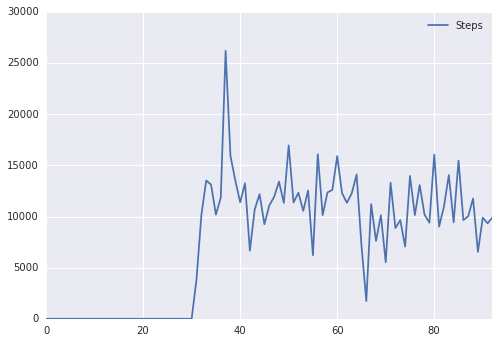

In [8]:
date_steps_df.plot()

Remove all days with 0 steps.

In [10]:
date_steps_df = date_steps_df[date_steps_df.Steps != 0]

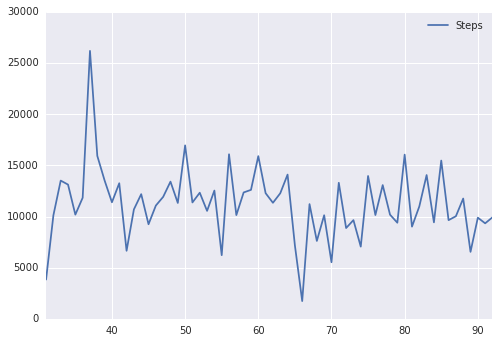

In [11]:
date_steps_df.plot()